🏦 Indian Equities (Indices)
| Asset            | Yahoo Finance Ticker |
| ---------------- | -------------------- |
| Nifty 50 Index   | `^NSEI`              |
| Nifty Bank Index | `^NSEBANK`           |
| BSE Sensex       | `^BSESN`             |
| Nifty IT         | `^CNXIT`             |
| Nifty Pharma     | `^CNXPHARMA`         |

🏦 Government Bonds
| Asset                           | Yahoo Finance Ticker                                                           |
| ------------------------------- | ------------------------------------------------------------------------------ |
| India 10Y Government Bond Yield | `^IRX` (approx) or use `^GSPC10Y` as proxy; direct data may require RBI source |

🪙 Commodities
| Asset            | Yahoo Finance Ticker |
| ---------------- | -------------------- |
| Gold (USD/ounce) | `GC=F`               |
| Silver           | `SI=F`               |
| Crude Oil (WTI)  | `CL=F`               |

💰 Forex / Currency
| Asset   | Yahoo Finance Ticker |
| ------- | -------------------- |
| USD/INR | `INR=X`              |
| EUR/INR | `EURINR=X`           |
| GBP/INR | `GBPINR=X`           |

🪙 Cryptocurrencies (Optional)
| Asset    | Yahoo Finance Ticker |
| -------- | -------------------- |
| Bitcoin  | `BTC-USD`            |
| Ethereum | `ETH-USD`            |


In [51]:
# Dictionary of Indian market assets
assets = {
    "Nifty 50": "^NSEI",
    "Nifty Bank": "^NSEBANK",
    "BSE Sensex": "^BSESN",
    "Nifty IT": "^CNXIT",
    "Nifty Pharma": "^CNXPHARMA",
    "USD/INR": "INR=X",
    "EUR/INR": "EURINR=X",
    "GBP/INR": "GBPINR=X",
    "Gold (USD/oz)": "GC=F",
    "Silver (USD/oz)": "SI=F",
    "Crude Oil WTI": "CL=F",
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD"
}

for name, ticker in assets.items():
  print(f'{name:15} (has the ticker): {ticker:30}')


Nifty 50        (has the ticker): ^NSEI                         
Nifty Bank      (has the ticker): ^NSEBANK                      
BSE Sensex      (has the ticker): ^BSESN                        
Nifty IT        (has the ticker): ^CNXIT                        
Nifty Pharma    (has the ticker): ^CNXPHARMA                    
USD/INR         (has the ticker): INR=X                         
EUR/INR         (has the ticker): EURINR=X                      
GBP/INR         (has the ticker): GBPINR=X                      
Gold (USD/oz)   (has the ticker): GC=F                          
Silver (USD/oz) (has the ticker): SI=F                          
Crude Oil WTI   (has the ticker): CL=F                          
Bitcoin         (has the ticker): BTC-USD                       
Ethereum        (has the ticker): ETH-USD                       


/tmp/ipython-input-3519016164.py:60: MatplotlibDeprecationWarning:

Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.

/tmp/ipython-input-3519016164.py:66: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



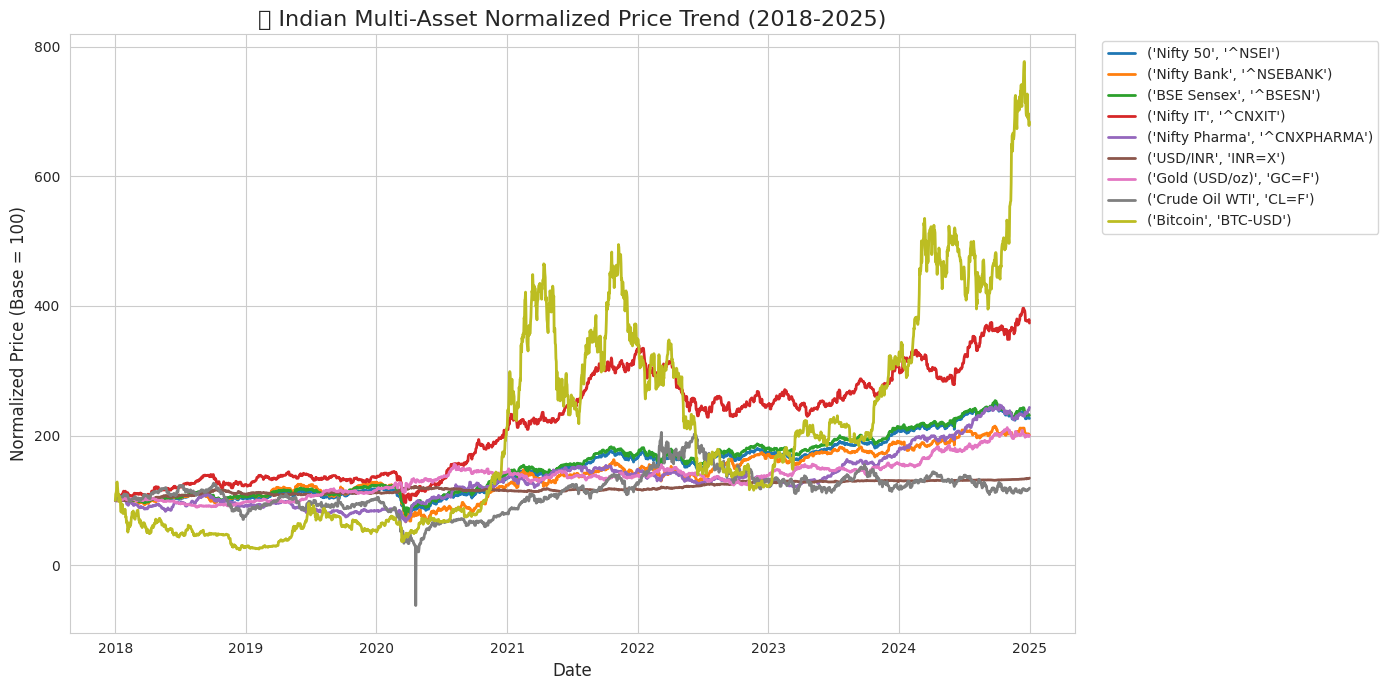

/tmp/ipython-input-3519016164.py:72: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



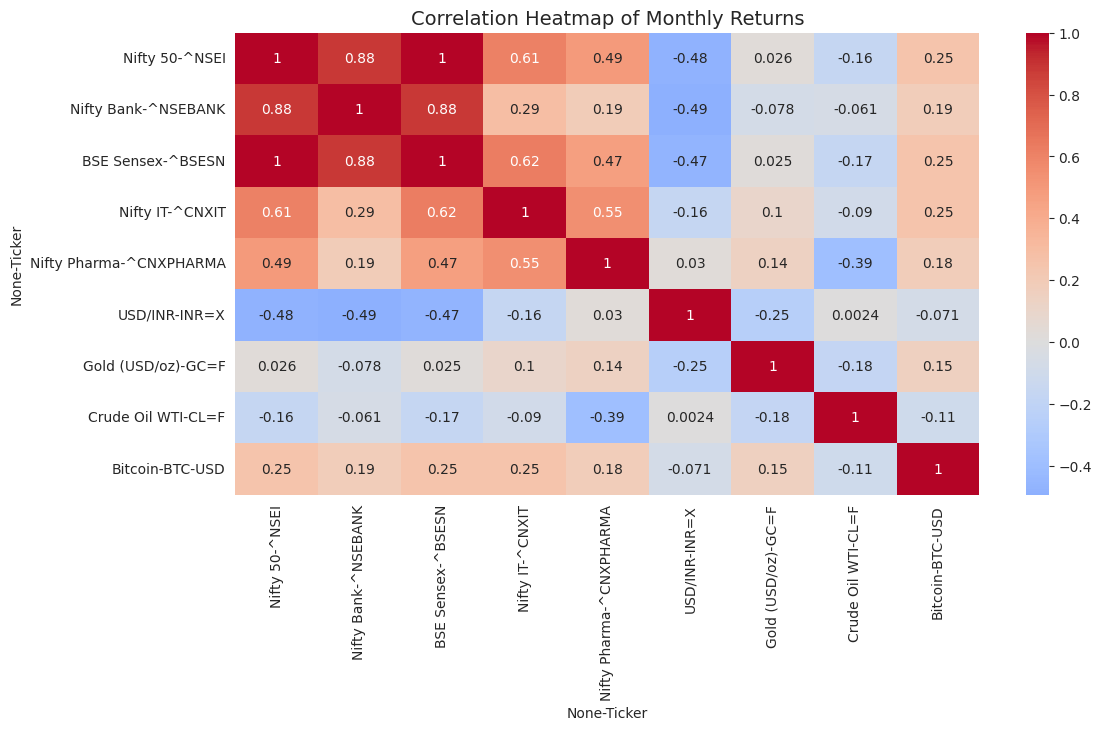

In [25]:
# -----------------------------
# Imports
# -----------------------------
"""
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# Assets to Analyze
# -----------------------------
assets = {
    'Nifty 50': '^NSEI',
    'Nifty Bank': '^NSEBANK',
    'BSE Sensex': '^BSESN',
    'Nifty IT': '^CNXIT',
    'Nifty Pharma': '^CNXPHARMA',
    'USD/INR': 'INR=X',
    'Gold (USD/oz)': 'GC=F',
    'Crude Oil WTI': 'CL=F',
    'Bitcoin': 'BTC-USD'
}

start_date = '2018-01-01'
end_date = '2025-01-01'

# -----------------------------
# Download Data
# -----------------------------
series_dict = {}
for name, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=False)
    if not df.empty and 'Adj Close' in df.columns:
        series_dict[name] = df['Adj Close']
    else:
        print(f"⚠️ Skipped {name} ({ticker}) - no data returned")

# -----------------------------
# Build Price DataFrame
# -----------------------------
if not series_dict:
    raise ValueError("No valid data downloaded. Please check tickers.")

price_df = pd.concat(series_dict, axis=1)
price_df = price_df.ffill().bfill()  # fill gaps due to holiday mismatches

# Normalize (Base = 100)
norm_df = price_df / price_df.iloc[0] * 100
"""
# -----------------------------
# Static Plot
# -----------------------------
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

for col in norm_df.columns:
    plt.plot(norm_df.index, norm_df[col], label=col, linewidth=2)

plt.title('📊 Indian Multi-Asset Normalized Price Trend (2018-2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (Base = 100)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# -----------------------------
# Correlation Heatmap (Monthly Returns)
# -----------------------------
returns = price_df.pct_change().resample('M').sum() * 100  # monthly %
plt.figure(figsize=(12, 6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Monthly Returns", fontsize=14)
plt.show()

# -----------------------------
# Interactive Plotly Dashboard
# -----------------------------
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Normalized Price Trend", "Daily Returns Distribution"))

# Price Trend
for col in norm_df.columns:
    fig.add_trace(
        go.Scatter(x=norm_df.index, y=norm_df[col], mode='lines', name=str(col)),
        row=1, col=1
    )

# Daily Returns
for col in price_df.columns:
    fig.add_trace(
        go.Box(y=price_df[col].pct_change().dropna() * 100, name=str(col), boxmean='sd'),
        row=2, col=1
    )

fig.update_layout(
    title="📈 Interactive Indian Multi-Asset Analysis (2018-2025)",
    template="plotly_dark",
    width=1000, height=800
)

fig.show()



# 📊 Analysis Report: Multi-Asset Normalized Price Trends (2018–2025)

## 🔎 Analysis Overview
**Objective:** Interpret two visualizations showing correlations and trend dynamics of a small set of assets:  
*Nifty 50, Nifty Bank, BSE Sensex, Nifty IT, Nifty Pharma, USD/INR, Gold, Crude Oil, and Bitcoin.*  
The time frame spans **2018–2025**, with prices normalized to a base value of **100**.

**Visuals reviewed:**
- 📈 **Correlation heatmap** for monthly returns across the assets.  
- 📉 **Interactive line chart** showing normalized price trends (base = 100).  

**Key interpretation points:**
- Correlation heatmap highlights **which assets move together or inversely**, indicating diversification benefits or concentration risks.  
- The line chart reveals **relative performance trajectories, volatility bursts, and leadership shifts** among assets.  

---

## 💡 Key Insights

### 🪙 Bitcoin (BTC-USD)
- Dominates upside performance during multiple periods, especially after 2020.  
- Shows **pronounced momentum and sharp swings**, ending well above other assets in later years.  
- Acts as a **high-volatility anchor**, driving portfolio risk but also offering significant upside.  

### 📈 Equity Indices (Nifty 50, Nifty Bank, Nifty IT, Nifty Pharma, BSE Sensex)
- Exhibit **correlated uptrends** with phases of leadership dispersion.  
- Major indices trend upward (2018–2021/22), but trajectories diverge later.  
- **Nifty IT & Nifty Pharma**: steadier appreciation.  
- **Nifty Bank & BSE Sensex**: mirror broader market, but with distinct drawdowns/spikes.  

### 💵 USD/INR (FX Proxy)
- Demonstrates **negative correlation** with risk-on assets during several phases.  
- Reflects **capital flows and flight-to-quality** behavior during uncertainty.  

### 🪙 Gold (GC=F)
- Behaves as a **defensive hedge** with subdued long-term gains.  
- **Less volatile** than equities/crypto; stabilizes portfolio in mixed regimes.  
- Weak correlation with equities → **diversification value**.  

### 🛢️ Commodities (Crude Oil WTI)
- Shows **episodic surges** linked to macro-energy cycles.  
- Spikes during supply shocks and demand rebounds → **volatility driver** in portfolios.  

### ⚡ Volatility Patterns
- **Bitcoin** contributes the highest volatility, driving portfolio risk if unhedged.  
- Oil and certain equity segments add variability, requiring allocation controls.  

---

## ✅ Actionable Insights

### 🌀 Diversification Strategy
- Maintain a **balanced mix** across equities, FX, and commodities.  
- Reduce exposure or **volatility-manage Bitcoin** if risk tolerance is moderate.  

### ⚠️ Risk Management
- Apply **volatility-aware sizing** for high-risk assets (BTC, Oil).  
- Use **stop-losses, trailing stops, or macro hedges** during policy or inflation shocks.  
- Keep **Gold as a hedge** against equity drawdowns and tightening cycles.  

### 🧩 Portfolio Construction
- Apply **core–satellite structure**:  
  - **Core**: Indian indices (Nifty 50, BSE Sensex), hedges (Gold, USD/INR).  
  - **Satellite**: Opportunistic plays (Bitcoin, Oil).  
- **Rebalance periodically** to capture regime changes (e.g., BTC momentum spikes, oil surges).  

### 📉 Regime Identification Cues
- **BTC outperformance + rising volatility** → high-risk, high-reward phase.  
- **Equity correlations rising** → herd behavior, limited diversification.  
- **Gold outperforming while equities dip** → hedging signal.  

### 🔬 Further Analytics
- Run **rolling correlations (6–12M)** to track evolving relationships.  
- Study **drawdown profiles** for hedging/stopping rules.  
- Overlay **macro indicators** (interest rates, inflation, USD trends) for deeper regime context.  

---


In [24]:
# -----------------------------
# Compute Daily Returns
# -----------------------------
returns_df = price_df.pct_change().dropna() * 100  # daily returns in %
# Clip extreme outliers (keep between -20% and +20%)
returns_df = returns_df.clip(lower=-20, upper=20)

# -----------------------------
# Interactive Plotly Dashboard
# -----------------------------
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Normalized Price Trend", "Daily Returns Distribution"))

# Price Trend
for col in norm_df.columns:
    fig.add_trace(
        go.Scatter(x=norm_df.index, y=norm_df[col], mode='lines', name=str(col)),
        row=1, col=1
    )

# Daily Returns Distribution (Boxplot)
for col in returns_df.columns:
    fig.add_trace(
        go.Box(y=returns_df[col], name=str(col), boxmean='sd'),
        row=2, col=1
    )

fig.update_layout(
    title="📈 Interactive Indian Multi-Asset Analysis (2018-2025) with Outlier-Clipped Returns",
    template="plotly_dark",
    width=1000, height=800
)

fig.show()


# 📊 Analysis Report: Interactive Multi-Asset Analysis (2018–2025)

## 🔎 Analysis Overview
**Objective:** Extract insights from the two-panel Plotly visualization titled:  
*“Interactive Indian Multi-Asset Analysis (2018–2025) with Outlier-Clipped Returns.”*  

**Panels reviewed:**
- **Upper panel:** Normalized Price Trend (base = 100) for Indian assets and global proxies  
  *(Nifty 50, Nifty Bank, BSE Sensex, Nifty IT, Nifty Pharma, USD/INR, Gold, Crude Oil, Bitcoin).*  
- **Lower panel:** Daily Returns Distribution (outlier-clipped markers by asset).  

**Time window:** 2018–2025.  
**Key objective:** Identify **relative performance, risk signals, divergence/convergence patterns**, and **hedging/diversification opportunities**.  

---

## 💡 Key Insights

### 🪙 Bitcoin (BTC-USD)
- **Upside leader** in later years, especially after mid-2020s.  
- Strong breakout momentum, ending consistently above peers.  
- **Implication:** High-growth lever but introduces **substantial tail risk**.  

### 📈 Indian Equity Indices
- **Nifty 50, Nifty Bank, BSE Sensex, Nifty IT, Nifty Pharma** → broad correlated uptrends.  
- Leadership rotates: IT & Pharma outperform during certain macro cycles, while Bank/Sensex mirror broader beta.  
- **Observation:** Sector-level beta within Indian equities drives cyclical leadership.  

### 💵 USD/INR (Macro Proxy)
- Moves **inversely to risk-on assets** in several periods.  
- Sometimes co-moves during regime shifts.  
- **Practical role:** Acts as a **hedge/macro signal** of capital flows.  

### 🪙 Gold (GC=F)
- Functions as a **stabilizer**, showing low volatility.  
- Gains modestly during risk-off phases.  
- **Hedging role:** Portfolio ballast during drawdowns or inflationary shocks.  

### 🛢️ Crude Oil (CL=F)
- **Volatility spikes** tied to supply/demand shocks.  
- Episodic surges align with macro energy cycles.  
- **Consideration:** Oil adds cyclical **portfolio beta** risk.  

### 📉 Daily Returns Distribution
- Outliers clipped, but dispersion remains high in **Bitcoin and Oil**.  
- Equity indices and gold show tighter clusters.  
- **Takeaway:** **Tail risk concentrated in crypto and commodities.**  

---

## ✅ Actionable Insights

### 🌀 Portfolio Construction & Diversification
- Keep **core exposure** in Indian equities (Nifty 50, BSE Sensex).  
- Selective overweight in **IT and Pharma** (secular growth trends).  
- Introduce **volatility-aware allocations** for Bitcoin & Oil (position sizing, volatility targeting).  
- **Goal:** Preserve upside while reducing drawdowns.  

### ⚠️ Hedging & Risk Management
- Use **Gold** as a hedge in drawdowns/inflation spikes.  
- Monitor **USD/INR** as a **macro flow detector**.  
- Apply **stop-losses/dynamic hedges** for high-volatility assets (BTC).  

### 📊 Regime-Dependent Strategy
- **Risk-on regimes:** BTC & equities lead → overweight IT, Pharma, crypto (within limits).  
- **Risk-off regimes:** Gold & USD/INR strengthen → tilt defensive, reduce crypto.  

### 📈 Risk Metrics & Monitoring
- Run **rolling correlations (6–12M)** for regime detection.  
- Track **drawdown depth & recovery times** per asset.  
- Add a **volatility surface/heatmap** for tail risk visualization.  

---

